In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Generate Synthetic Data
# Features: Random values, Labels: Sum of features > 1.5
np.random.seed(42)
X = np.random.rand(1000, 2)  # 1000 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1.0).astype(int)  # Binary classification labels

# Step 2: Split Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standard Scaling
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation data (DO NOT fit on validation data)
X_val_scaled = scaler.transform(X_val)

# Step 4: Build the Neural Network
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),  # Hidden layer
    Dense(8, activation='relu'),                # Another hidden layer
    Dense(1, activation='sigmoid')             # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the Neural Network
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6243 - loss: 0.6366 - val_accuracy: 0.9700 - val_loss: 0.5119
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9659 - loss: 0.4771 - val_accuracy: 0.9900 - val_loss: 0.3577
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9834 - loss: 0.3326 - val_accuracy: 0.9900 - val_loss: 0.2336
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.2106 - val_accuracy: 0.9900 - val_loss: 0.1609
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9870 - loss: 0.1558 - val_accuracy: 0.9900 - val_loss: 0.1213
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9866 - loss: 0.1214 - val_accuracy: 1.0000 - val_loss: 0.0982
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9964 - loss: 0.0857 - val_accuracy: 1.0000 - val_loss: 0.0836
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9972 - loss: 0.0867 - val_accuracy: 1.0000 - val_loss

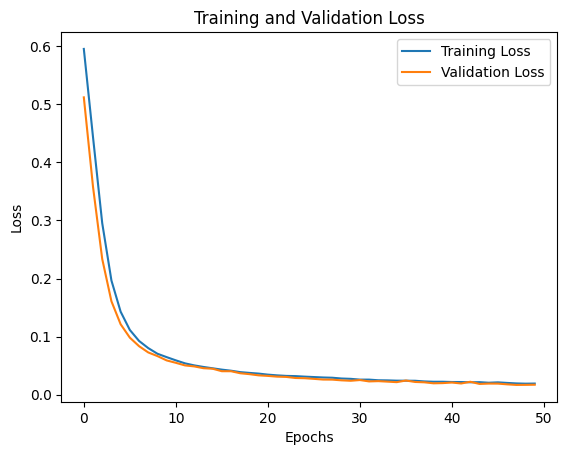

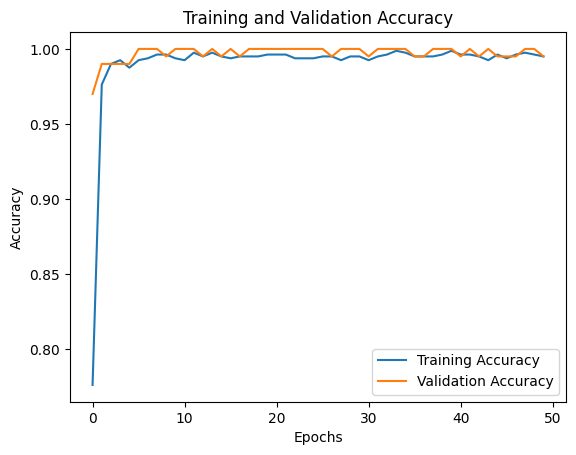

In [2]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()